<a href="https://colab.research.google.com/github/pavan03ds/Feature-Engineering/blob/main/5_Handle_missing_values_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# All about different types of missing data
https://towardsdatascience.com/missing-value-handling-missing-data-types-a89c0d81a5bb

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Feature Engineering/titanic.csv")

In [ ]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Missing completely at random (MCAR)
Missing Completely at Random, MCAR, means there is no relationship between the missingness of the data and any values, observed or missing. Those missing data points are a random subset of the data. There is nothing systematic going on that makes some data more likely to be missing than others.

In [ ]:
df[df.Embarked.isnull()]     #this fall under the first type of missing data (MCAR)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


In [ ]:
df.Cabin.isnull().mean()   #the percentage of null values in cabin 

0.7710437710437711

In [ ]:
df['cabin_null'] = np.where(df.Cabin.isnull(),1,0)

In [ ]:
df['cabin_null'].head()

0    1
1    0
2    1
3    0
4    1
Name: cabin_null, dtype: int64

#

## Missing not at random (MNAR)
<b>Missing not at random or nonignorable data is data where the mechanism for why the data is missing is known.</b> Still, the values can not effectively be inferred or predicted.

In [ ]:
df.groupby('Survived')['cabin_null'].mean()   # this is second type of missing data 

Survived
0    0.876138
1    0.602339
Name: cabin_null, dtype: float64

Above cabin_null is related to 'survived'

# 

## Missing at random (MAR)
In contrast to MCAR, MAR does not assume that the other variables cannot predict the missing value. <b>This type is perhaps more often the case when there are errors with recording the data correctly.
    


# 

# All techniques to handle misssing data
https://www.mastersindatascience.org/learning/how-to-deal-with-missing-data/

1. Mean/Median/Mode replacement
2. Random Sample Imputation
3. Capturing NAN values with a new feature
4. End of Distribution imputation
5. Arbitrary imputation
6. Frequent categories imputation

## Mean/ Median and Mode imputation
When should we apply? Mean/Median/Mode imputation has the assumption that the data are missing completely at random(MCAR). 
- We solve this by replacing the NAN with the most frequent occurance of the variables

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Feature Engineering/titanic.csv",usecols = ['Age','Fare','Survived'])

In [ ]:
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [ ]:
df.isna().mean()  #calculating percentage of nulls

Survived    0.000000
Age         0.198653
Fare        0.000000
dtype: float64

Impute Age with median

In [ ]:
def impute_nan(data,variable,median):            #function to create a new featuer with filled na's
    data[variable+'_median'] = data[variable].fillna(median)

In [ ]:
median = df.Age.median()   
median

28.0

In [ ]:
impute_nan(df,'Age',median)  #calling the function

In [ ]:
df.head()

,Survived,Age,Fare,Age_median
0,0,22.0,7.2500,22.0
1,1,38.0,71.2833,38.0
2,1,26.0,7.9250,26.0
3,1,35.0,53.1000,35.0
4,0,35.0,8.0500,35.0


In [ ]:
#lets check and compare standard deviations
print(df['Age'].std())
print(df['Age_median'].std())

14.526497332334042
13.019696550973201


lets see the distribution graphically

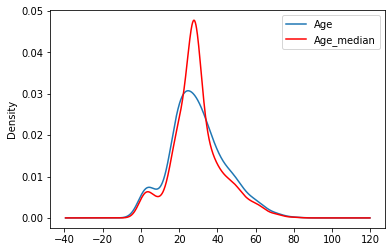

In [ ]:
fig = plt.figure()
ax = fig.add_subplot()
df['Age'].plot(kind='kde', ax=ax)
df['Age_median'].plot(kind='kde', ax=ax, color='red')
lines, lables = ax.get_legend_handles_labels()
ax.legend(lines, lables, loc='best')
plt.show()

##Advantages And Disadvantages of Mean/Median Imputation
###Advantages
1. Easy to implement(Robust to outliers)
2. Faster way to obtain the complete dataset 
###Disadvantages
1. Change or Distortion in the original variance
2. Impacts Correlation